-  iphoneから傾き、加速度センサ、ジャイロセンサ、位置情報を取得し、可視化を行った。
- なお、別添htmlの通りJS部分を変更し、許可により傾き等のデータを得られるようにし、ログデータは各センサの値が１行に並ぶようにした。
- 時刻のデータがずれており、グリニッジ標準時間になっているように思われた。iphone及びhtmlファイルを参照したsafariの設定は日本時間になっており、原因は分からなかった。また、こちらも原因を調べきれていないが、orientationのabsoluteの値も得られていない。

In [106]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import folium
import japanize_matplotlib
import matplotlib.image as mpimg

In [76]:
df = pd.read_csv('/Users/ShuntaroMiwa/00_python/lecture/10_cyber_physical/umedu/1112 (加工).csv')
df

,時刻,方向_alpha,方向_beta,方向_gamma,方向_absolute,加速度_x,加速度_y,加速度_z,角加速速度_x,角加速速度_y,角加速速度_z,回転率_alpha,回転率_beta,回転率_gamma,回転率_interval,latitude,longitude,altitude
0,2021/11/12 14:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.289078,136.258911,91.000282
1,2021/11/12 14:04,356.636941,53.783010,4.710376,NaN,-0.040818,0.023861,0.189119,0.434997,-7.887998,-5.585522,-1.710225,3.534317,1.410725,0.016667,35.289078,136.258911,91.000282
2,2021/11/12 14:04,358.110209,54.127288,-0.803388,NaN,0.020720,-0.036934,-0.097946,-0.059855,-7.983466,-5.843946,0.869454,1.573339,-0.253437,0.016667,35.289078,136.258911,91.000282
3,2021/11/12 14:04,353.667930,54.613971,2.774443,NaN,0.060008,-0.024172,-0.094380,0.334889,-8.019231,-5.766583,3.622641,0.186188,-0.403325,0.016667,35.289078,136.258911,91.000282
4,2021/11/12 14:04,352.975240,55.292343,3.432728,NaN,-0.005884,-0.001641,0.005472,0.328455,-8.063374,-5.568314,0.492614,-0.207802,-0.324478,0.016667,35.289078,136.258911,91.000282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,2021/11/16 0:17,340.444930,-1.567663,3.855539,NaN,-0.001356,0.003607,-0.019722,0.657807,0.271892,-9.800515,0.075080,0.098818,-0.034417,0.016667,35.278389,136.246863,90.669273
826,2021/11/16 0:17,340.431717,-1.576805,3.869564,NaN,0.000891,0.001294,-0.016934,0.662445,0.271144,-9.797522,-0.056633,-0.031381,0.016133,0.016667,35.278389,136.246863,90.669273
827,2021/11/16 0:17,340.432647,-1.560481,3.831666,NaN,0.007206,0.005733,-0.003852,0.662296,0.272790,-9.784953,0.090488,-0.083999,-0.035330,0.016667,35.278389,136.246863,90.669273
828,2021/11/16 0:41,340.430641,-1.565445,3.838451,NaN,0.002009,-0.003795,-0.008143,0.658256,0.264111,-9.789142,-0.029534,-0.025407,0.040362,0.016667,35.278389,136.246863,90.669273


In [77]:
df2= df.drop("方向_absolute",axis=1)

In [78]:
df2.shape

(830, 17)

In [79]:
df2.isna().sum()

時刻              0
方向_alpha        6
方向_beta         6
方向_gamma        6
加速度_x           6
加速度_y           6
加速度_z           6
角加速速度_x         6
角加速速度_y         6
角加速速度_z         6
回転率_alpha       6
回転率_beta        6
回転率_gamma       6
回転率_interval    6
latitude        3
longitude       3
altitude        3
dtype: int64

In [123]:
df_dr = df2.dropna()
df_dr['時刻'] = pd.to_datetime(df_dr['時刻'])
df_dr.set_index('時刻', inplace = True)
df_dr.shape

/var/folders/0x/mngd87jd7gs5216gvs0wlw200000gn/T/ipykernel_13963/1524210654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dr['時刻'] = pd.to_datetime(df_dr['時刻'])


(824, 16)

In [124]:
df_dr

,方向_alpha,方向_beta,方向_gamma,加速度_x,加速度_y,加速度_z,角加速速度_x,角加速速度_y,角加速速度_z,回転率_alpha,回転率_beta,回転率_gamma,回転率_interval,latitude,longitude,altitude
時刻,,,,,,,,,,,,,,,,
2021-11-12 14:04:00,356.636941,53.783010,4.710376,-0.040818,0.023861,0.189119,0.434997,-7.887998,-5.585522,-1.710225,3.534317,1.410725,0.016667,35.289078,136.258911,91.000282
2021-11-12 14:04:00,358.110209,54.127288,-0.803388,0.020720,-0.036934,-0.097946,-0.059855,-7.983466,-5.843946,0.869454,1.573339,-0.253437,0.016667,35.289078,136.258911,91.000282
2021-11-12 14:04:00,353.667930,54.613971,2.774443,0.060008,-0.024172,-0.094380,0.334889,-8.019231,-5.766583,3.622641,0.186188,-0.403325,0.016667,35.289078,136.258911,91.000282
2021-11-12 14:04:00,352.975240,55.292343,3.432728,-0.005884,-0.001641,0.005472,0.328455,-8.063374,-5.568314,0.492614,-0.207802,-0.324478,0.016667,35.289078,136.258911,91.000282
2021-11-12 14:04:00,344.178978,33.569709,14.566773,-0.233094,0.078291,0.085026,1.821987,-5.344308,-7.823353,-3.696118,1.831154,-1.465295,0.016667,35.289078,136.258911,91.000282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-16 00:17:00,340.444930,-1.567663,3.855539,-0.001356,0.003607,-0.019722,0.657807,0.271892,-9.800515,0.075080,0.098818,-0.034417,0.016667,35.278389,136.246863,90.669273
2021-11-16 00:17:00,340.431717,-1.576805,3.869564,0.000891,0.001294,-0.016934,0.662445,0.271144,-9.797522,-0.056633,-0.031381,0.016133,0.016667,35.278389,136.246863,90.669273
2021-11-16 00:17:00,340.432647,-1.560481,3.831666,0.007206,0.005733,-0.003852,0.662296,0.272790,-9.784953,0.090488,-0.083999,-0.035330,0.016667,35.278389,136.246863,90.669273


In [84]:
df_dr= df_dr.rename(columns={'latitude': 'lat','longitude': 'lon'})

## 位置情報と高度の可視化

In [86]:
map = folium.Map(location=[df_dr.lat[1], df_dr.lon[1]], zoom_start=18)
locations = df_dr.loc[:, ['lat', 'lon']].values.tolist()

folium.PolyLine(locations=locations).add_to(map)

for i, row in df_dr.iterrows():
    folium.CircleMarker([row['lat'], row['lon']], radius=np.sqrt(row['altitude']) ,
                    popup=row['altitude'],fill_color='#EDA098', fill_opacity=0.5).add_to(map)

map

- ほぼ大学と自宅との往復である。行った覚えのない箇所のデータ（西端）もあり、数十mの誤差が出るようである。
- 高度はおおよそ85m前後であった。他の資料をあたったところ、馬場一丁目の標高は85.9mであり、彦根は意外に高いのだと感じた。ただし、自宅(4階)や大学の院生室（3階）は高度データから明確に区別できないように思う。

## 加速度と角加速速度の可視化

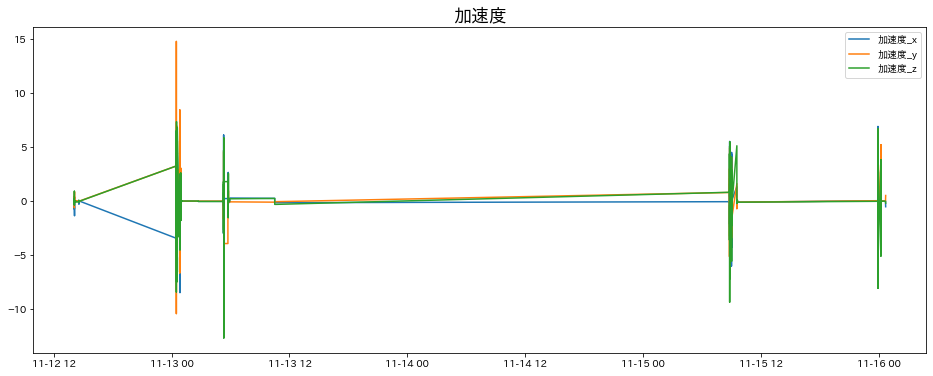

In [107]:
plt.figure(figsize=(16,6))
plt.plot(df_dr.index, df_dr['加速度_x'], label="加速度_x")
plt.plot(df_dr.index, df_dr['加速度_y'], label="加速度_y")
plt.plot(df_dr.index, df_dr['加速度_z'], label="加速度_z")
plt.title("加速度", fontsize=18)
plt.legend()

# 日付表示のフォーマット
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%d%H"))

- 11/13の分散が大きいが、これは自転車を使っていたためと思われる。

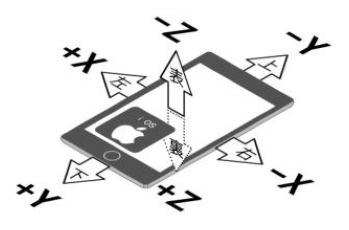

In [110]:
img = mpimg.imread('/Volumes/GoogleDrive/My Drive/00 shiga-u/10 サイバーフィジカル特論/梅津/Pasted Graphic 15.jpg')
plt.axis("off")
imgplot = plt.imshow(img)

- センサのx軸、y軸、z軸の確認のために表示。

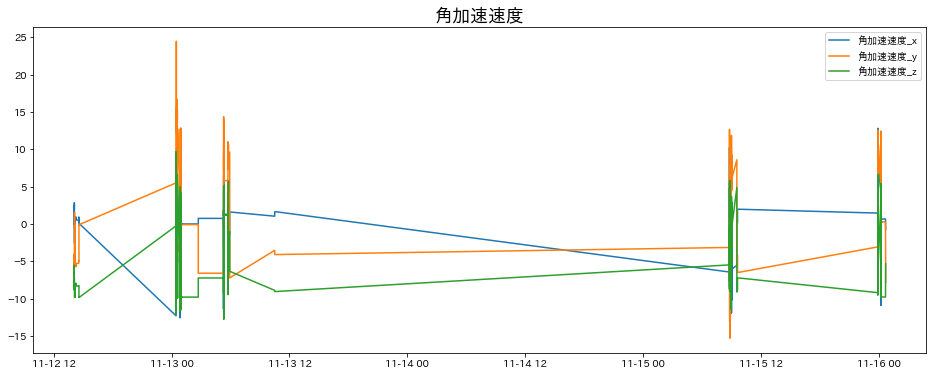

In [108]:
plt.figure(figsize=(16,6))
plt.plot(df_dr.index, df_dr['角加速速度_x'], label="角加速速度_x")
plt.plot(df_dr.index, df_dr['角加速速度_y'], label="角加速速度_y")
plt.plot(df_dr.index, df_dr['角加速速度_z'], label="角加速速度_z")
plt.title("角加速速度", fontsize=18)
plt.legend()

## 傾きの可視化

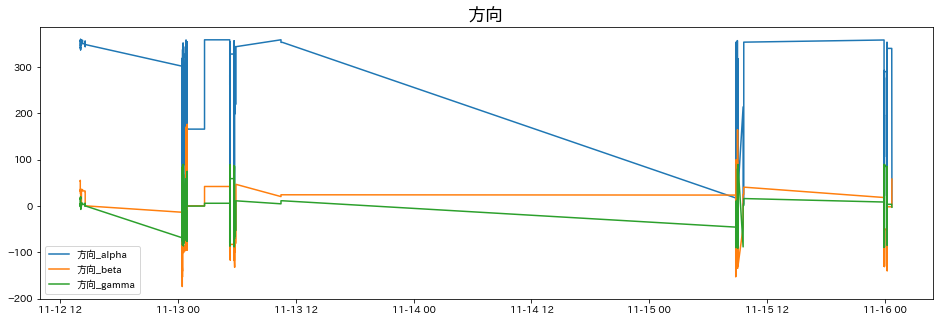

In [121]:
plt.figure(figsize=(16,5))
plt.plot(df_dr.index, df_dr['方向_alpha'], label="方向_alpha")
plt.plot(df_dr.index, df_dr['方向_beta'], label="方向_beta")
plt.plot(df_dr.index, df_dr['方向_gamma'], label="方向_gamma")
plt.title("方向", fontsize=18)
plt.legend()

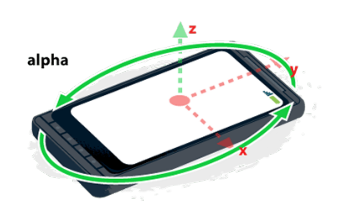

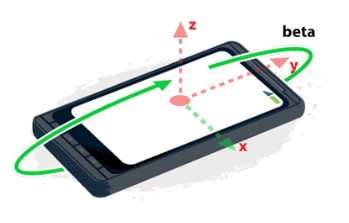

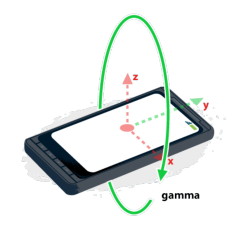

In [118]:
img1 = mpimg.imread('/Users/ShuntaroMiwa/00_python/lecture/10_cyber_physical/umedu/alpha.png')
img2 = mpimg.imread('/Users/ShuntaroMiwa/00_python/lecture/10_cyber_physical/umedu/beta.png')
img3 = mpimg.imread('/Users/ShuntaroMiwa/00_python/lecture/10_cyber_physical/umedu/gamma.png')
plt.axis("off")
imgplot = plt.imshow(img1)
plt.show()
plt.axis("off")
imgplot = plt.imshow(img2)
plt.show()
plt.axis("off")
imgplot = plt.imshow(img3)
plt.show()

- 引用
https://developers.google.com/web/fundamentals/native-hardware/device-orientation?hl=ja

### 折れ線グラフで可視化してみたものの、加速度や方向のデータは使用方法や解釈が難しい。例えば路面状況の把握など、明確な目的があって活きるデータだろうと感じた。